In [1]:
import pandas as pd
new_df = pd.read_csv("data/processed_data.csv")

# Decision Tree Classifier

In [2]:
#find best numeric variables
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

#numeric vars
for col in new_df:
    if new_df[col].dtypes != "object":
        y = pd.DataFrame(new_df["STATUS"])
        X = pd.DataFrame(new_df[col])

    # Split the Dataset into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    # Decision Tree using Train Data
        dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
        dectree.fit(X_train, y_train)                    # train the decision tree model
        y_train_pred = dectree.predict(X_train)
        print("Train Data for " +  col)
        print("Accuracy  :\t", dectree.score(X_train, y_train))
        print()

Train Data for ID
Accuracy  :	 0.9967672949719003

Train Data for FLAG_OWN_CAR
Accuracy  :	 0.9966180932013726

Train Data for FLAG_OWN_REALTY
Accuracy  :	 0.9963694235838265

Train Data for CNT_CHILDREN
Accuracy  :	 0.9962699557368081

Train Data for AMT_INCOME_TOTAL
Accuracy  :	 0.9967175610483912

Train Data for FLAG_MOBIL
Accuracy  :	 0.9965683592778635

Train Data for FLAG_WORK_PHONE
Accuracy  :	 0.9967175610483912

Train Data for FLAG_PHONE
Accuracy  :	 0.9964191575073358

Train Data for FLAG_EMAIL
Accuracy  :	 0.9967175610483912

Train Data for CNT_FAM_MEMBERS
Accuracy  :	 0.996916496742428

Train Data for APPLICANT_AGE
Accuracy  :	 0.9962699557368081

Train Data for YEARS_WORKING
Accuracy  :	 0.9966678271248819

Train Data for TOTAL_GOOD_DEBT
Accuracy  :	 0.9963196896603173

Train Data for TOTAL_BAD_DEBT
Accuracy  :	 0.9971154324364649

Train Data for STATUS
Accuracy  :	 1.0

Train Data for GOOD_PERCENT
Accuracy  :	 0.998458248371214



In [3]:
non_int = ["ID","STATUS","TOTAL_GOOD_DEBT","TOTAL_BAD_DEBT"]
for col in new_df:
    if new_df[col].dtypes == "object":
        non_int.append(col)
x1 = new_df.drop(columns=non_int)
x1

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,APPLICANT_AGE,YEARS_WORKING,GOOD_PERCENT
0,1,1,0,112500,1,0,0,0,2,59,3,1
1,0,1,0,270000,1,0,1,1,1,52,8,1
2,0,1,0,270000,1,0,1,1,1,52,8,1
3,0,1,0,270000,1,0,1,1,1,52,8,1
4,0,1,0,270000,1,0,1,1,1,52,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25129,1,1,0,315000,1,0,0,0,2,48,7,1
25130,0,1,0,157500,1,0,1,1,2,34,4,0
25131,0,1,0,157500,1,0,1,1,2,34,4,0
25132,0,1,0,283500,1,0,0,0,2,49,2,1


In [4]:
import matplotlib.pyplot as plt 
import seaborn as sb
sb.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


non_int = ["ID","STATUS","TOTAL_GOOD_DEBT","TOTAL_BAD_DEBT"]
for col in new_df:
    if new_df[col].dtypes == "object":
        non_int.append(col)
x1 = new_df.drop(columns=non_int) 
y1 = pd.DataFrame(new_df['STATUS'])
#x1 =pd.DataFrame(new_df[[""]])
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size = 0.2)

dectree = DecisionTreeClassifier(max_depth = 3) # create the decision tree object
dectree.fit(X_train1, y_train1)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred1 = dectree.predict(X_train1)
y_test_pred1 = dectree.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train1, y_train1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test1, y_test1))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9989555876063063

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9974139645912075



<AxesSubplot:>

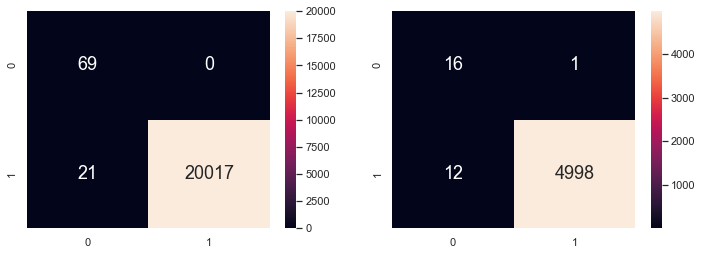

In [5]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.6, 0.875, 'GOOD_PERCENT <= 0.5\ngini = 0.007\nsamples = 20107\nvalue = [69, 20038]\nclass = Good'),
 Text(0.4, 0.625, 'APPLICANT_AGE <= 24.5\ngini = 0.375\nsamples = 92\nvalue = [69, 23]\nclass = Bad'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Good'),
 Text(0.6, 0.375, 'AMT_INCOME_TOTAL <= 175500.0\ngini = 0.358\nsamples = 90\nvalue = [69, 21]\nclass = Bad'),
 Text(0.4, 0.125, 'gini = 0.231\nsamples = 45\nvalue = [39, 6]\nclass = Bad'),
 Text(0.8, 0.125, 'gini = 0.444\nsamples = 45\nvalue = [30, 15]\nclass = Bad'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 20015\nvalue = [0, 20015]\nclass = Good')]

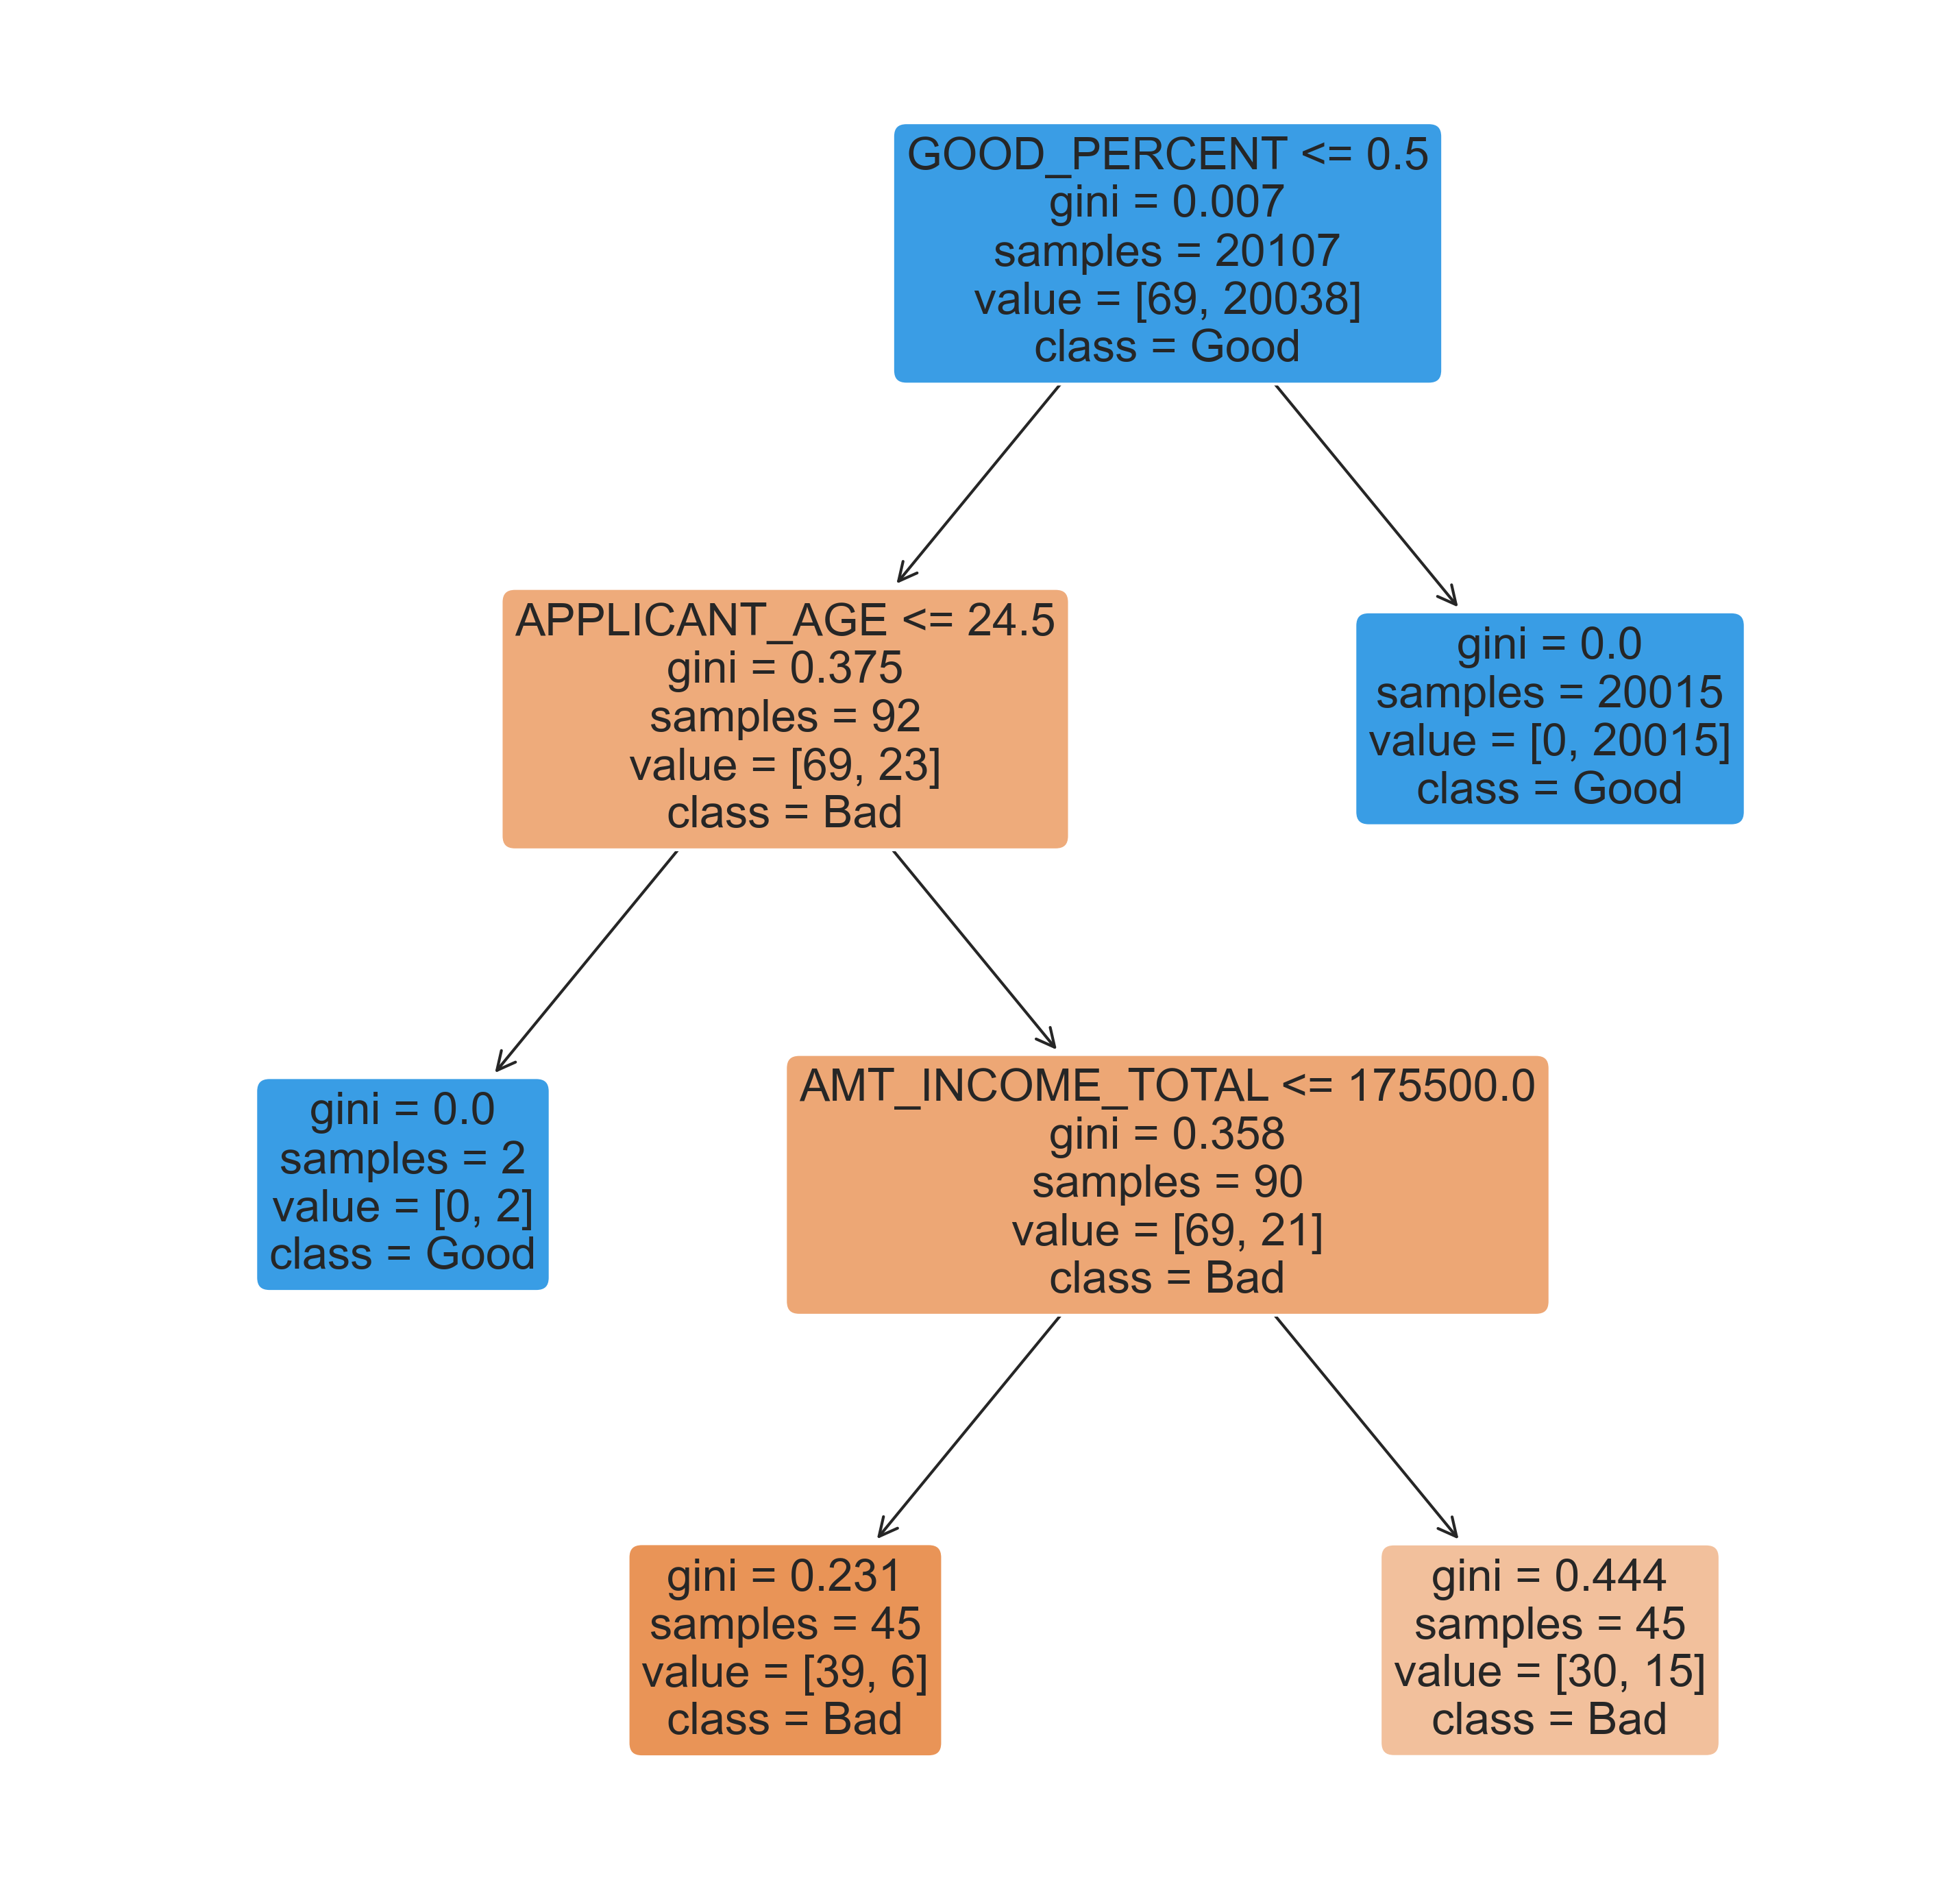

In [6]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12), dpi = 300)
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train1.columns, 
          class_names=["Bad","Good"])